In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

In [41]:
data_dir="DATASET/test"
chest=[]
for file in os.listdir(data_dir):
    chest+=[file]
print(chest)
print(len(chest))

['NORMAL', 'PNEUMONIA']
2


In [42]:
img_height,img_width=224,224
batch_size=20
train_dir=r'DATASET\train'
test_dir=r'DATASET\test'

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')
test_generator = train_datagen.flow_from_directory(test_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 2776 images belonging to 2 classes.
Found 510 images belonging to 2 classes.


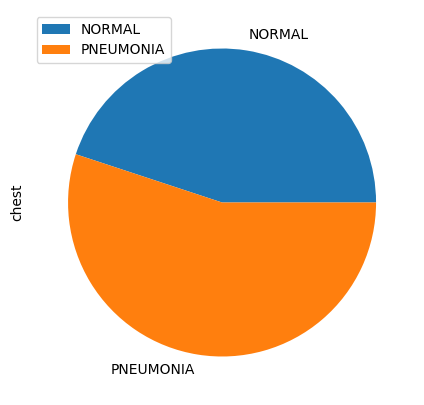

In [44]:
df = pd.DataFrame({'chest': [4.87 , 5.97],
                   'radius': [6051.8, 6378.1]},
                  index=['NORMAL', 'PNEUMONIA'])
plot = df.plot.pie(y='chest', figsize=(5, 5))

In [6]:
 
base_model=tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet')
model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='sigmoid'))
model2.summary()


model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
history2=model2.fit(train_generator,
          epochs=15,
        validation_data=test_generator)

model2.save("models/Mobilenetv2.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

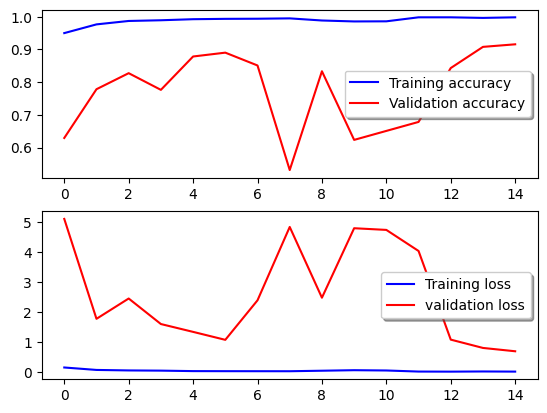

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history2.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(history2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history2.history['loss'], color='b', label="Training loss")
ax[1].plot(history2.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [6]:
base_model = tf.keras.applications.ResNet50(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [7]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model.fit_generator(train_generator,epochs=15,validation_data=test_generator,verbose=1)

C:\Users\0611\AppData\Local\Temp\ipykernel_12892\2831929341.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model.fit_generator(train_generator,epochs=15,validation_data=test_generator,verbose=1)


Epoch 1/15
139/139 [==============================] - 1322s 9s/step - loss: 0.1610 - accuracy: 0.9449 - val_loss: 1.6067 - val_accuracy: 0.5412
Epoch 2/15
139/139 [==============================] - 1419s 10s/step - loss: 0.0773 - accuracy: 0.9690 - val_loss: 3.6224 - val_accuracy: 0.5412
Epoch 3/15
139/139 [==============================] - 1503s 11s/step - loss: 0.0854 - accuracy: 0.9715 - val_loss: 5.3599 - val_accuracy: 0.5412
Epoch 4/15
139/139 [==============================] - 1488s 11s/step - loss: 0.0287 - accuracy: 0.9896 - val_loss: 3.5252 - val_accuracy: 0.5412
Epoch 5/15
139/139 [==============================] - 1286s 9s/step - loss: 0.0293 - accuracy: 0.9917 - val_loss: 4.7768 - val_accuracy: 0.5412
Epoch 6/15
139/139 [==============================] - 1410s 10s/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 5.1897 - val_accuracy: 0.5412
Epoch 7/15
139/139 [==============================] - 1501s 11s/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 3.7088 - val_accu

In [8]:
model.evaluate(test_generator)
model.save("ResNet.h5")

26/26 [==============================] - 46s 2s/step - loss: 1.1954 - accuracy: 0.7824


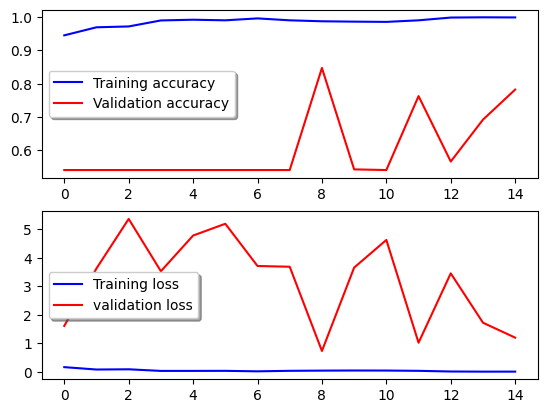

In [9]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [38]:
Accuracy = [99.82,99.86]
Accuracy

[99.82, 99.86]

1/1 [==============================] - 0s 153ms/step
[6.6589616e-04 9.9928397e-01]


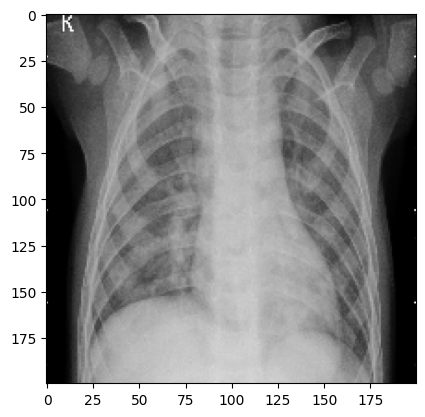

Prediction: PNEUMONIA


In [50]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'DATASET\test\PNEUMONIA\person37_virus_82.jpeg', grayscale=False, target_size=(224,224))
show_img=image.load_img(r'DATASET\test\PNEUMONIA\person37_virus_82.jpeg', grayscale=False, target_size=(200, 200))
Food = chest
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',chest[ind])